In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('event_data_train.csv')
df.head(10)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [4]:
submit_df = pd.read_csv('submissions_data_train.csv')
submit_df.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [5]:
df['date']= pd.to_datetime(df.timestamp, unit = 's')

In [6]:
submit_df['date']= pd.to_datetime(submit_df.timestamp, unit = 's')
submit_df['day']=submit_df.date.dt.date

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480703 entries, 0 to 3480702
Data columns (total 5 columns):
step_id      int64
timestamp    int64
action       object
user_id      int64
date         datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 132.8+ MB


In [8]:
df.date.min()

Timestamp('2015-06-15 04:00:48')

In [9]:
df.date.max()

Timestamp('2018-05-19 23:33:31')

In [10]:
df['day']=df.date.dt.date

In [11]:
df.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


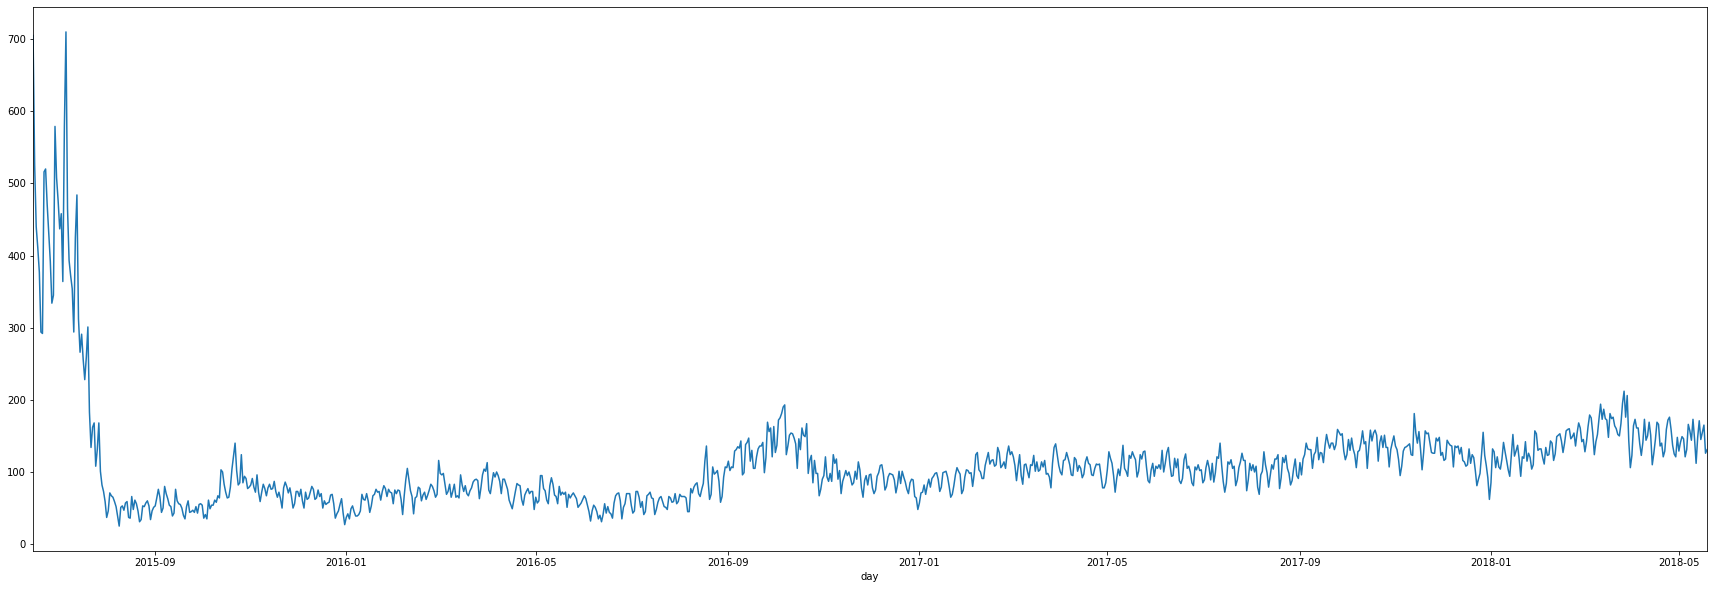

In [12]:
df.groupby('day') \
    .user_id.nunique().plot(figsize=(30,10))

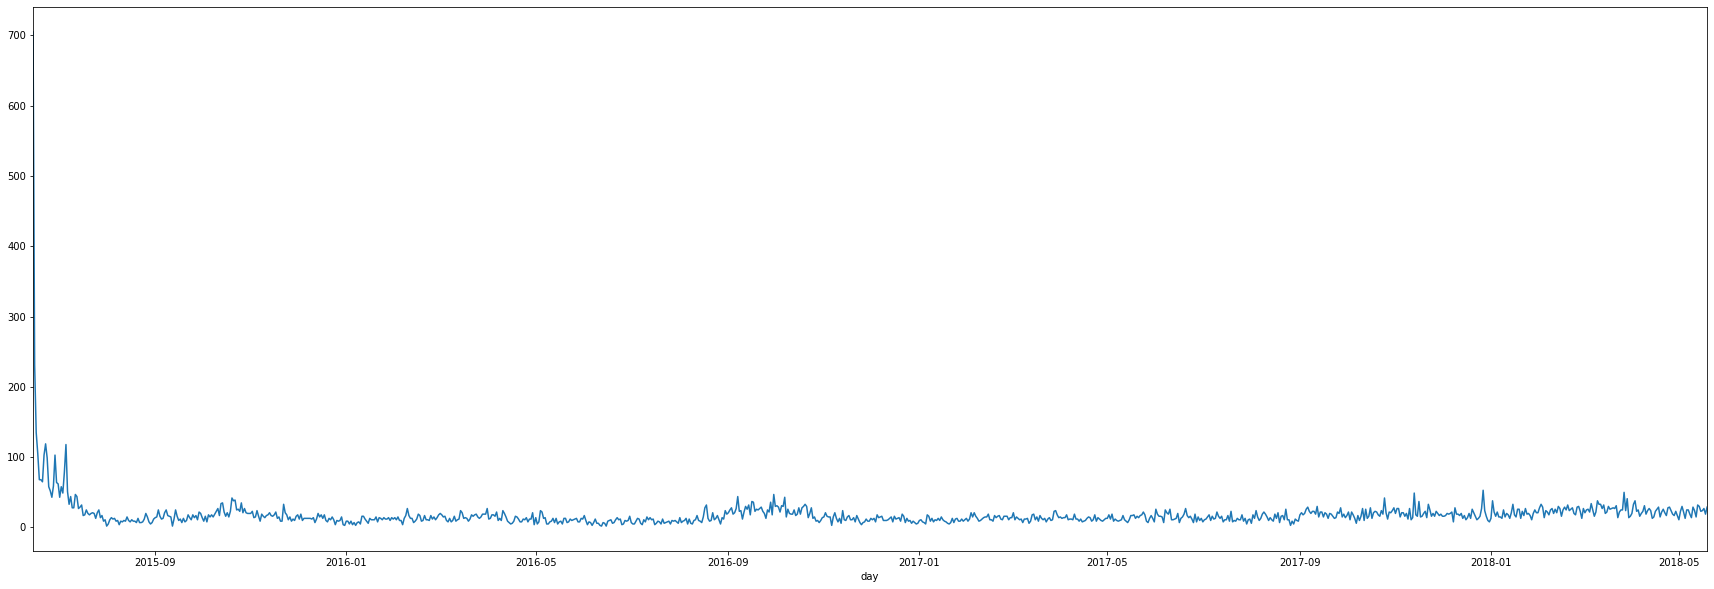

In [13]:
starting_date = df.groupby("user_id", as_index = False).day.min()

new_users = starting_date.groupby("day").user_id.nunique().plot(figsize=(30,10))

In [14]:
#df[df.action=='passed'] \
#    .groupby('user_id', as_index=False) \
#    .agg({'step_id':'count'}) \
#    .rename(columns={'step_id':'passed_steps'}).passed_steps.hist()

In [15]:
users_event_data = df.pivot_table(index='user_id', columns='action', values = 'step_id', aggfunc='count', fill_value=0).reset_index()

In [16]:
df.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [17]:
submit_df.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [18]:
user_score = submit_df.pivot_table(index='user_id', columns='submission_status', values = 'step_id', aggfunc='count', fill_value=0).reset_index()

In [19]:
user_score.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [20]:
df.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [21]:
gap_data = df[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id','day']) \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).values

In [22]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))

In [23]:
gap_data = gap_data/(24*60*60)

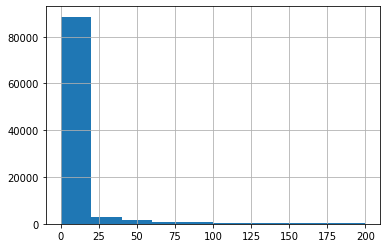

In [24]:
gap_data[gap_data < 200].hist()

In [25]:
gap_data.quantile(0.95)

59.760440972222156

In [26]:
df[]

SyntaxError: invalid syntax (<ipython-input-26-71f11347ebfc>, line 1)

In [27]:
df.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [28]:
users_data = df.groupby('user_id', as_index=False) \
    .agg({'timestamp':'max'}).rename(columns ={'timestamp':'last_timestamp'})

In [29]:
users_data.head()

,user_id,last_timestamp
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660


In [30]:
now = 1526772811
dropout_treshold = 30*24*60*60

In [31]:
users_data['is_gone_user'] = (now - users_data.last_timestamp) > dropout_treshold

In [32]:
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [33]:
user_score.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [34]:
users_data = users_data.merge(user_score, how='outer')

In [35]:
users_data=users_data.fillna(0)

In [36]:
users_data = users_data.merge(users_event_data, how = 'outer')

In [37]:
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()

NameError: name 'events_data' is not defined

In [38]:
users_event_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [ ]:
users_days.to_frame().reset_index()

In [ ]:
users_data = users_data.merge(users_days, how ='outer')

In [39]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1


In [ ]:
users_data['passed_course'] = users_data.passed > 170